In [1]:
import tensorflow as tf

In [2]:
tf.Variable(5)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>

In [3]:
x = tf.Variable(5)
y = tf.Variable(5)

In [4]:
x + y

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [5]:
tf.ones(5)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>

In [6]:
tf.ones([5,5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [7]:
tf.zeros([4,5])

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
import matplotlib.pyplot as plt

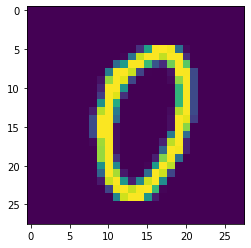

In [14]:
plt.imshow(x_train[1000])

In [15]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
model = Sequential([
    # used to convert ND to 1D, so it will make 784 neurons in input layer
    Flatten(input_shape=(28,28)), # input layer : 784 neurons
    Dense(512, activation="tanh"), # Hidden Layer : 512 neurons
    Dense(256, activation="tanh"), # Hidden Layer : 256 neurons
    Dense(10, activation="softmax") # Output Layer : 10 neurons
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(x_train,y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


C:\Users\asus\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2277 - accuracy: 0.9314 - val_loss: 0.1313 - val_accuracy: 0.9605
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1072 - accuracy: 0.9670 - val_loss: 0.0974 - val_accuracy: 0.9691
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0773 - accuracy: 0.9751 - val_loss: 0.0846 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0862 - val_accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0485 - accuracy: 0.9841 - val_loss: 0.0821 - val_accuracy: 0.9741
